### **Combine Analysis and Visulaization**

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import nltk
import re

In [3]:
# Read data from files
data_p = pd.read_csv('QVI_purchase_behaviour.csv')
data_t = pd.read_excel('QVI_transaction_data.xlsx')

In [4]:
# Merge the dataframes
data_new = data_t.merge(data_p, on='LYLTY_CARD_NBR', how='left')
data_new.isnull().sum()

,0
DATE,0
STORE_NBR,0
LYLTY_CARD_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0
LIFESTAGE,0
PREMIUM_CUSTOMER,0


In [5]:
# dimensions of the datasets
data_new.shape


(264836, 10)

In [6]:
data_new.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


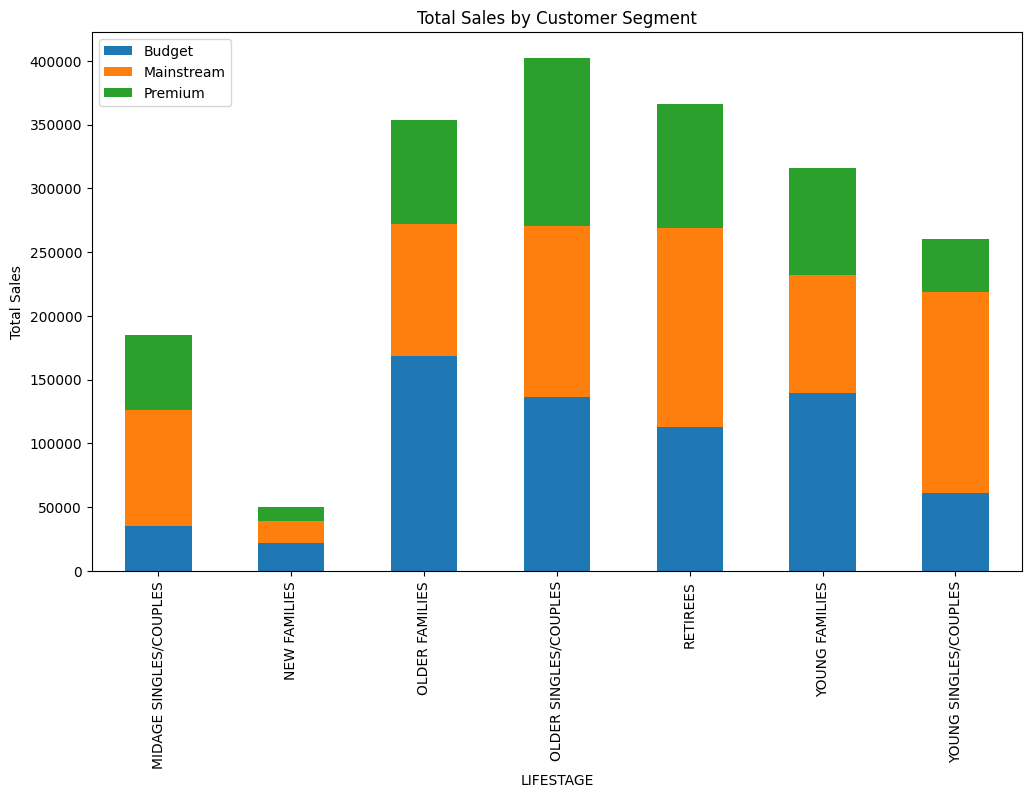

In [8]:
# Total sales by PREMIUM_CUSTOMER and LIFESTAGE
sales = pd.DataFrame(data_new.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).TOT_SALES.sum())
sales.rename(columns = {'TOT_SALES': 'Total Sales'}, inplace = True)
sales.sort_values(by = 'Total Sales', ascending = False, inplace = True)
salesPlot = pd.DataFrame(data_new.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).TOT_SALES.sum())
salesPlot.unstack().plot(kind = 'bar', stacked = True, figsize = (12, 7), title = 'Total Sales by Customer Segment')
plt.ylabel('Total Sales')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)


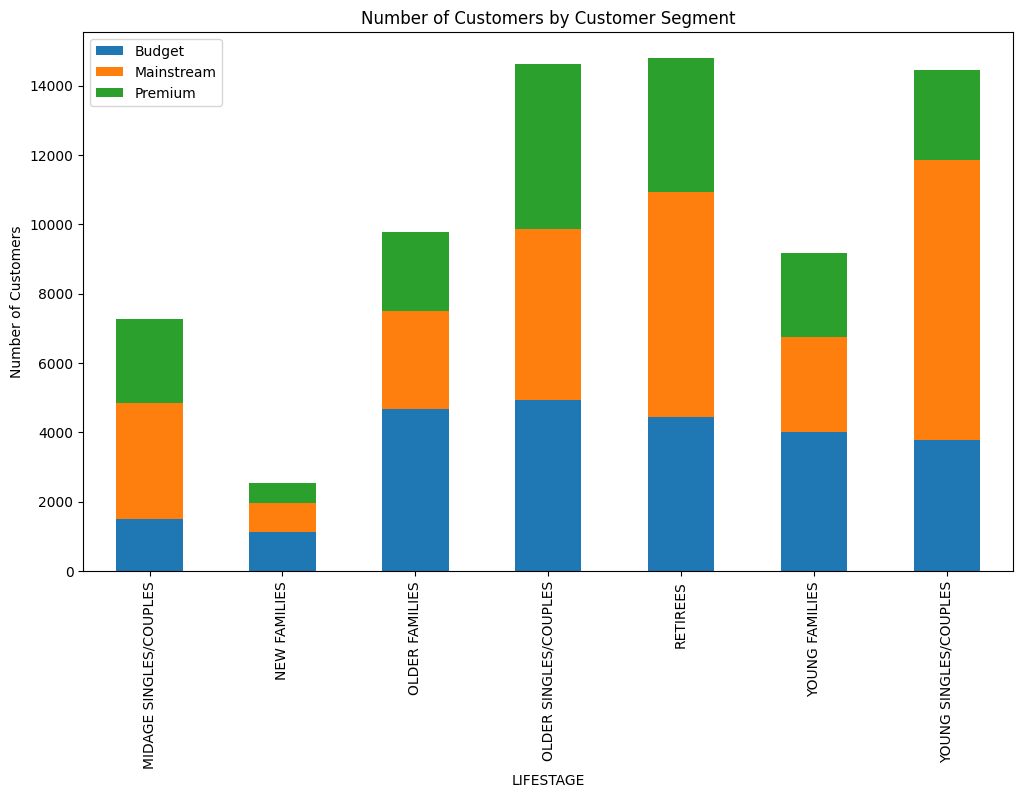

In [9]:
# Number of customers by PREMIUM_CUSTOMER and LIFESTAGE
customers = pd.DataFrame(data_new.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).LYLTY_CARD_NBR.nunique())
customers.rename(columns = {'LYLTY_CARD_NBR': 'Number of Customers'}, inplace = True)
customers.sort_values(by = 'Number of Customers', ascending = False).head(10)
customersPlot = pd.DataFrame(data_new.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique())
customersPlot.unstack().plot(kind = 'bar', stacked = True, figsize = (12, 7), title = 'Number of Customers by Customer Segment')
plt.ylabel('Number of Customers')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)

Text(0.5, 0, 'Price per Unit')

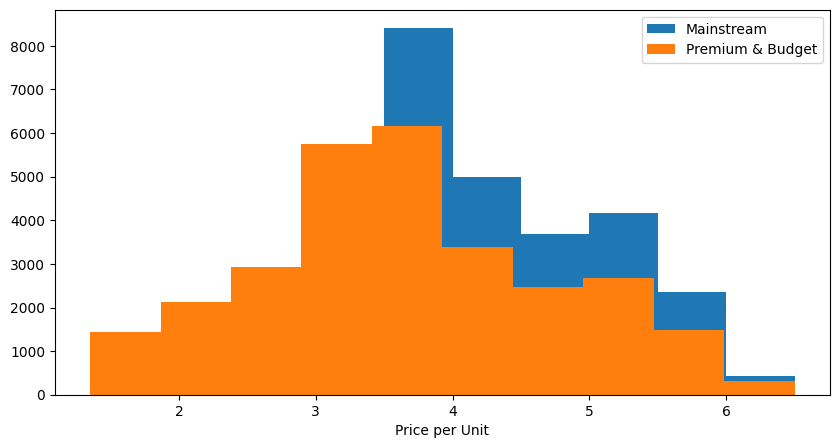

In [13]:
# Create a new dataframe pricePerUnit
ppu = data_new

# Create a new column under pricePerUnit called PRICE
ppu['PRICE'] = ppu['TOT_SALES'] / ppu['PROD_QTY']

ppu.head()

# Group the data into mainstream and others
mainstream = ppu.loc[(ppu['PREMIUM_CUSTOMER'] == 'Mainstream') & ( (ppu['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (ppu['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') ), 'PRICE']
others = ppu.loc[(ppu['PREMIUM_CUSTOMER'] != 'Mainstream') & ( (ppu['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (ppu['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') ), 'PRICE']

# Visualise
plt.figure(figsize = (10, 5))
plt.hist(mainstream, label = 'Mainstream')
plt.hist(others, label = 'Premium & Budget')
plt.legend()
plt.xlabel('Price per Unit')